In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import time
from sklearn.cluster import KMeans

In [3]:
df = pd.read_csv('data/2012.csv', encoding='euc-kr')

In [4]:
for y in range(2013, 2023):
    new_df = pd.read_csv('data/{}.csv'.format(y), encoding='euc-kr')
    df = pd.concat([df, new_df])

,지점,지점명,일시,적설(cm),3시간신적설(cm)
0,90,속초,2012-01-01 00:00,1.6,NaN
1,90,속초,2012-01-01 03:00,1.6,NaN
2,90,속초,2012-01-01 04:00,1.6,NaN
3,90,속초,2012-01-01 05:00,1.6,NaN
4,90,속초,2012-01-01 06:00,1.6,NaN
...,...,...,...,...,...
8094,278,의성,2022-03-19 13:00,0.4,NaN
8095,284,거창,2022-01-19 20:00,0.2,NaN
8096,284,거창,2022-01-19 21:00,0.1,NaN
8097,284,거창,2022-03-19 11:00,0.1,NaN


In [1178]:
df = df.reset_index(drop=True)


In [1268]:
df.groupby('지점명').count()

,지점,일시,적설(cm),3시간신적설(cm)
지점명,,,,
강릉,475,475,475,475
강진군,716,716,716,716
강화,693,693,693,693
거제,27,27,27,27
거창,1669,1669,1669,1669
...,...,...,...,...
합천,43,43,43,43
해남,389,389,389,389
홍성,1181,1181,1181,1181


In [1179]:
df['일시'][0]

'2012-01-01 00:00'

In [1180]:
time.mktime(time.strptime(df['일시'][1], '%Y-%m-%d %H:%M')) - time.mktime(time.strptime(df['일시'][0], '%Y-%m-%d %H:%M'))


10800.0

In [1360]:
def is_cont(df):
    point = np.array(df['지점'])
    location = np.array(df['지점명'])
    date = np.array(df['일시'])
    snow = np.array(df['적설(cm)']) * 10
    year = []
    month = []
    day = []
    hour = []
    strp = []
    mk = []
    continuous_1_hour = []
    continuous_3_hours = []
    continuous_6_hours = []

    for n, t in enumerate(date):
        t = time.strptime(t, '%Y-%m-%d %H:%M')
        strp.append(t)
        mk.append(time.mktime(t))
        year.append(t.tm_year)
        month.append(t.tm_mon)
        day.append(t.tm_mday)
        hour.append(t.tm_hour)

    for n, k in enumerate(mk):
        is_1_hour = (k + 3600.0 in mk)
        is_3_hours = (k + 10800.0 in mk)
        is_6_hours = (k + 21600.0 in mk)
        continuous_1_hour.append(is_1_hour)
        continuous_3_hours.append(is_3_hours)
        continuous_6_hours.append(is_6_hours)
    dic = {'point': point, 'location': location, 'snow': snow, 'year': year, 'month': month, 'day': day, 'hour': hour, 'con_1h': continuous_1_hour, 'con_3h': continuous_3_hours, 'con_6h': continuous_6_hours}
    df2 = pd.DataFrame(dic)
    return df2

In [1361]:
df_90 = df[df['지점명']=='철원'].fillna(0)
df_90 = df_90[df_90['적설(cm)']>0]

In [1362]:
df2_90 = is_cont(df_90)


In [1363]:
df2_90

,point,location,snow,year,month,day,hour,con_1h,con_3h,con_6h
0,95,철원,1.0,2012,1,3,15,True,True,True
1,95,철원,7.0,2012,1,3,16,True,True,True
2,95,철원,12.0,2012,1,3,17,True,True,True
3,95,철원,12.0,2012,1,3,18,True,True,True
4,95,철원,12.0,2012,1,3,19,True,True,True
...,...,...,...,...,...,...,...,...,...,...
4336,95,철원,6.0,2022,3,20,6,True,True,False
4337,95,철원,6.0,2022,3,20,7,True,True,False
4338,95,철원,13.0,2022,3,20,8,True,False,False
4339,95,철원,11.0,2022,3,20,9,True,False,False


In [1364]:
df2_90_train = df2_90[df2_90['year'] < 2018]
# df2_90_train = df[df['year'] < 2019]
df2_90_test = df2_90[df2_90['year'] >= 2018]

In [1365]:
df2_90_test

,point,location,snow,year,month,day,hour,con_1h,con_3h,con_6h
2981,95,철원,7.0,2018,1,8,20,True,True,True
2982,95,철원,10.0,2018,1,8,21,True,True,True
2983,95,철원,16.0,2018,1,8,22,True,True,True
2984,95,철원,45.0,2018,1,8,23,True,True,True
2985,95,철원,44.0,2018,1,9,0,True,True,True
...,...,...,...,...,...,...,...,...,...,...
4336,95,철원,6.0,2022,3,20,6,True,True,False
4337,95,철원,6.0,2022,3,20,7,True,True,False
4338,95,철원,13.0,2022,3,20,8,True,False,False
4339,95,철원,11.0,2022,3,20,9,True,False,False


In [1366]:
def make_cluster_in_order(df):
    snow = np.log(np.array(df['snow'])).reshape(-1, 1)
    kmeans = KMeans(n_clusters=100)
    clusters = kmeans.fit(snow)
    df['cluster']=clusters.labels_
    minmax = []

    dtype = [('min', float), ('max', float), ('idx', int)]
    for i in set(df['cluster']):
        cc = df[df['cluster'] == i]
        minmax.append((cc['snow'].min(), cc['snow'].max(), i))

    # minmax = np.sort(minmax, axis=0)
    minmax = np.array(minmax, dtype=dtype)
    minmax = np.sort(minmax, axis=0, order='min')
    
    cluster_in_order = []
    for n, sn in enumerate(df['snow']):
        for k, m in enumerate(minmax):
            if m[0] <= sn <= m[1]:
                cluster_in_order.append(k)
    df['cluster'] = cluster_in_order
    
    
    return df, minmax
            

    

In [1367]:
def make_cluster_test_data(df, minmax):
    cluster_test = []
    snow = (np.array(df['snow']))
    for n, sn in enumerate(df['snow']):
        for k, m in enumerate(minmax):
            if k == len(minmax) - 1:
                cluster_test.append(k)
                break
            elif m[0] <= sn < minmax[k+1][0]:
                cluster_test.append(k)
                break
    df['cluster'] = cluster_test
    
    return df
                

In [1368]:
df2_90_train, minmax = make_cluster_in_order(df2_90_train)
df2_90_train
print(minmax)

C:\Users\fembem\anaconda3\envs\torch-1.10.1\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.
  warnings.warn(
C:\Users\fembem\AppData\Local\Temp\ipykernel_21512\3588320938.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster']=clusters.labels_


[(  1.,   1.,  8) (  2.,   2.,  3) (  3.,   3., 14) (  4.,   4., 10)
 (  5.,   5.,  4) (  6.,   6., 27) (  7.,   7., 22) (  8.,   8., 24)
 (  9.,   9.,  1) ( 10.,  10., 11) ( 11.,  11., 35) ( 12.,  12., 20)
 ( 13.,  13., 50) ( 14.,  14., 16) ( 15.,  15., 30) ( 16.,  16., 45)
 ( 17.,  17.,  7) ( 18.,  18., 40) ( 19.,  19., 46) ( 20.,  20., 15)
 ( 21.,  21., 87) ( 22.,  22., 52) ( 23.,  23., 21) ( 24.,  24., 63)
 ( 25.,  25., 48) ( 26.,  26., 32) ( 27.,  27., 42) ( 28.,  28.,  2)
 ( 29.,  29., 51) ( 30.,  30., 28) ( 31.,  31., 67) ( 32.,  32., 65)
 ( 33.,  33., 17) ( 34.,  34., 76) ( 35.,  35., 59) ( 36.,  36., 26)
 ( 37.,  37., 60) ( 38.,  38., 78) ( 39.,  39.,  9) ( 40.,  40., 58)
 ( 41.,  41., 66) ( 42.,  42., 49) ( 43.,  43., 31) ( 44.,  44., 64)
 ( 45.,  45., 62) ( 46.,  46., 18) ( 47.,  47., 57) ( 48.,  48., 80)
 ( 49.,  49., 88) ( 50.,  50., 39) ( 51.,  51., 72) ( 52.,  52.,  5)
 ( 53.,  53., 68) ( 54.,  54., 41) ( 55.,  55., 69) ( 56.,  56., 86)
 ( 57.,  57., 29) ( 58.,  58., 94)

C:\Users\fembem\AppData\Local\Temp\ipykernel_21512\3588320938.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_in_order


In [1369]:
markov = np.zeros((100, 100))

In [1370]:
for n, cl in enumerate(df2_90_train['cluster']):
    if n == len(df2_90_train['cluster'])-1:
        break
    markov[cl][df2_90_train['cluster'][n+1]] += 1

In [1371]:
markov_prob = np.zeros(markov.shape)
for n, row in enumerate(markov):
    row /= np.sum(row)
    markov_prob[n] = row

In [1372]:
hours = 6

In [1373]:
for i in range(hours - 1):
    markov_prob = markov_prob @ markov_prob

In [1374]:
markov_cum = np.zeros(markov.shape)
for n, row in enumerate(markov_prob):
    for m in range(len(row)):
        markov_cum[n][m] = np.sum(row[:m+1])

In [1375]:
df2_90_test = make_cluster_test_data(df2_90_test, minmax)

C:\Users\fembem\AppData\Local\Temp\ipykernel_21512\3962409001.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = cluster_test


In [1376]:
df2_90_test.groupby('cluster').count()

,point,location,snow,year,month,day,hour,con_1h,con_3h,con_6h
cluster,,,,,,,,,,
0,6,6,6,6,6,6,6,6,6,6
1,6,6,6,6,6,6,6,6,6,6
2,17,17,17,17,17,17,17,17,17,17
3,28,28,28,28,28,28,28,28,28,28
4,72,72,72,72,72,72,72,72,72,72
...,...,...,...,...,...,...,...,...,...,...
93,1,1,1,1,1,1,1,1,1,1
94,1,1,1,1,1,1,1,1,1,1
96,2,2,2,2,2,2,2,2,2,2


In [1377]:
pred_snow_ = []
for i in range(100):
    pred_cluster = [999] * hours
    for n, cl in enumerate(df2_90_test['cluster']):
        p = np.random.rand()
        row = markov_cum[cl]
        for k, r in enumerate(row):
            if p < r:
                pred_cluster.append(k)
                break
    pred_cluster = pred_cluster[:-hours]
    df2_90_test['pred_cluster'] = pred_cluster
    pred_snow = [0] * hours
    for n, cl in enumerate(df2_90_test['pred_cluster'][hours:]):
        a, b, _ = minmax[cl]
        pred_sn = np.random.uniform(a, b, 1)[0]
        pred_snow.append(pred_sn)
    pred_snow_.append(pred_snow)
pred_snow_ = np.array(pred_snow_)
pred_snow_.shape


C:\Users\fembem\AppData\Local\Temp\ipykernel_21512\1277007892.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_90_test['pred_cluster'] = pred_cluster


(100, 1360)

In [1378]:
mean = np.mean(pred_snow_, axis=0)
mean_95_ci = 2.576 * np.std(pred_snow_, axis=0) / np.sqrt(100)
df2_90_test['pred_snow_mean'] = mean
df2_90_test['pred_snow_low_int'] = mean - mean_95_ci
df2_90_test['pred_snow_high_int'] = mean + mean_95_ci

df2_90_test[:10]

C:\Users\fembem\AppData\Local\Temp\ipykernel_21512\449380236.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_90_test['pred_snow_mean'] = mean
C:\Users\fembem\AppData\Local\Temp\ipykernel_21512\449380236.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_90_test['pred_snow_low_int'] = mean - mean_95_ci
C:\Users\fembem\AppData\Local\Temp\ipykernel_21512\449380236.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

,point,location,snow,year,month,day,hour,con_1h,con_3h,con_6h,cluster,pred_cluster,pred_snow_mean,pred_snow_low_int,pred_snow_high_int
2981,95,철원,7.0,2018,1,8,20,True,True,True,6,999,0.000000,0.000000,0.000000
2982,95,철원,10.0,2018,1,8,21,True,True,True,9,999,0.000000,0.000000,0.000000
2983,95,철원,16.0,2018,1,8,22,True,True,True,15,999,0.000000,0.000000,0.000000
2984,95,철원,45.0,2018,1,8,23,True,True,True,44,999,0.000000,0.000000,0.000000
2985,95,철원,44.0,2018,1,9,0,True,True,True,43,999,0.000000,0.000000,0.000000
2986,95,철원,49.0,2018,1,9,1,True,True,True,48,999,0.000000,0.000000,0.000000
2987,95,철원,47.0,2018,1,9,2,True,True,True,46,28,19.771859,14.030171,25.513547
2988,95,철원,46.0,2018,1,9,3,True,True,True,45,17,19.590137,14.390412,24.789861
2989,95,철원,43.0,2018,1,9,4,True,True,True,42,55,20.505768,14.199914,26.811622
2990,95,철원,42.0,2018,1,9,5,True,True,True,41,79,39.354343,33.641784,45.066901


In [1379]:
snow_test = df2_90_test['snow'][df2_90_test[(df2_90_test['con_6h']==True)].index + hours]
pred_snow_test = df2_90_test['pred_snow_mean'][df2_90_test[(df2_90_test['con_6h']==True)].index + hours]
pred_snow_low_int = df2_90_test['pred_snow_low_int'][df2_90_test[(df2_90_test['con_6h']==True)].index + hours]
pred_snow_high_int = df2_90_test['pred_snow_high_int'][df2_90_test[(df2_90_test['con_6h']==True)].index + hours]
snow_test.shape

(1200,)

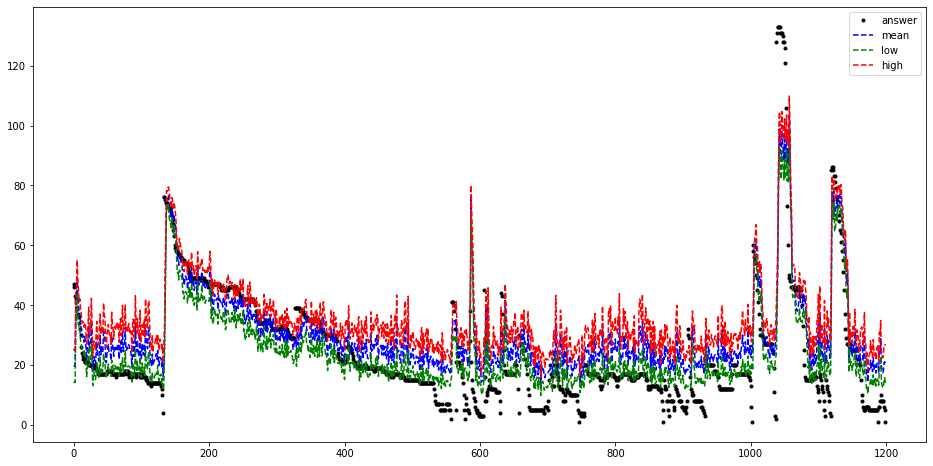

In [1380]:
plt.figure(figsize=(16,8))
# plt.plot(df2_90_test['snow'], 'b.', label='answer')
# plt.plot(df2_90_test['pred_snow'], 'r--', label='pred')
x = range(len(snow_test))
plt.plot(x, snow_test, 'k.', label='answer')
# plt.plot(pred_snow_test, 'r--', label='pred')
# plt.fill_between(x, pred_snow_low_int, pred_snow_high_int)
plt.plot(x, pred_snow_test, 'b--', label='mean')
plt.plot(x, pred_snow_low_int, 'g--', label='low')
plt.plot(x, pred_snow_high_int, 'r--', label='high')

plt.legend()

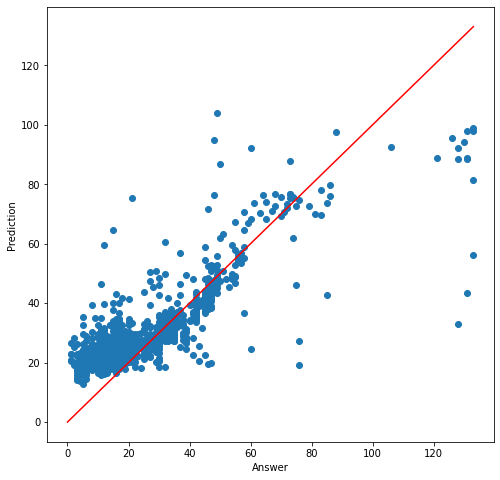

In [1381]:
plt.figure(figsize=(8,8))
plt.scatter(snow_test, pred_snow_test)
plt.xlabel('Answer')
plt.ylabel("Prediction")
plt.plot([0, np.max(snow_test)], [0, np.max(snow_test)], 'r-')

In [1382]:
np.sqrt(np.sum((snow_test - pred_snow_test) ** 2) / len(df2_90_test['snow']))

11.648830342848873

In [1349]:
np.unique(np.array(df2_90_test['cluster'] == df2_90_test['pred_cluster']), return_counts=True)

(array([False,  True]), array([1180,  180], dtype=int64))